<a href="https://colab.research.google.com/github/Oreki820/Projetos-EBAC/blob/main/Profissao_Cientista_de_Dados_M37_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [54]:
base = pd.read_csv('/content/marketing_campaign.csv', delimiter=';')

print("Formato da base:", base.shape)
display(base.head(3))

Formato da base: (2240, 16)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1


In [55]:
display(base.info())
display(base.describe(include='all').T)

# % de nulos
nulls = base.isna().mean().sort_values(ascending=False)
print("Percentual de nulos por coluna:")
display((nulls*100).round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,NaN,NaN,NaN,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,NaN,NaN,NaN,26.302232,39.773434,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2240.0,NaN,NaN,NaN,166.95,225.715373,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2240.0,NaN,NaN,NaN,37.525446,54.628979,0.0,3.0,12.0,50.0,259.0


Percentual de nulos por coluna:


,0
Income,1.07
Year_Birth,0.00
Education,0.00
Marital_Status,0.00
Kidhome,0.00
Recency,0.00
MntWines,0.00
MntFruits,0.00
MntMeatProducts,0.00
MntFishProducts,0.00


In [56]:
ANO_ATUAL = 2025
base["Age"] = ANO_ATUAL - base["Year_Birth"]

# Gasto total (soma das cestas de produtos)
gasto_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
base["MntTotal"] = base[gasto_cols].sum(axis=1)

# Compras totais (aproximação simples)
compras_cols = ["NumDealsPurchases","NumStorePurchases","WebPurchases"]
presentes = [c for c in compras_cols if c in base.columns]
base["ComprasTotal"] = base[presentes].sum(axis=1)

# Alvo binário: intenção de compra no site
base["IntencaoWeb"] = (base["WebPurchases"] > 0).astype(int)

print("Visão geral de novas colunas:")
display(base[["Age","MntTotal","ComprasTotal","NumWebVisitsMonth","WebPurchases","IntencaoWeb"]].describe())
print("Taxa de positivos (IntencaoWeb=1):", base["IntencaoWeb"].mean().round(3))

Visão geral de novas colunas:


,Age,MntTotal,ComprasTotal,NumWebVisitsMonth,WebPurchases,IntencaoWeb
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,56.194196,605.798214,6.293750,5.316518,0.503571,0.503571
std,11.984069,602.249288,3.549101,2.426645,0.500099,0.500099
min,29.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,68.750000,3.000000,3.000000,0.000000,0.000000
50%,55.000000,396.000000,6.000000,6.000000,1.000000,1.000000
75%,66.000000,1045.500000,9.000000,7.000000,1.000000,1.000000
max,132.000000,2525.000000,14.000000,20.000000,1.000000,1.000000


Taxa de positivos (IntencaoWeb=1): 0.504


In [57]:
#Idades anômalas (> 100) → resolverei filtrando Age entre 15 e 100.
base = base[(base['Age'] >= 15) & (base['Age'] <= 100)]

#Renda com outliers extremos (até 666 666) → usarei winsorization (clip 1º e 99º percentil).
q_low, q_hi = base['Income'].quantile([0.01, 0.99])
base['Income'] = base['Income'].clip(lower=q_low, upper=q_hi)

#Pequeno número de nulos (1,07 % em Income) → preencher com a mediana.
base['Income'] = base['Income'].fillna(base['Income'].median())

In [58]:
base[['Age','Income']].describe()

,Age,Income
count,2237.000000,2237.000000
mean,56.098346,51754.684131
std,11.701917,20617.389100
min,29.000000,7563.360000
25%,48.000000,35523.000000
50%,55.000000,51373.000000
75%,66.000000,68281.000000
max,85.000000,94461.440000


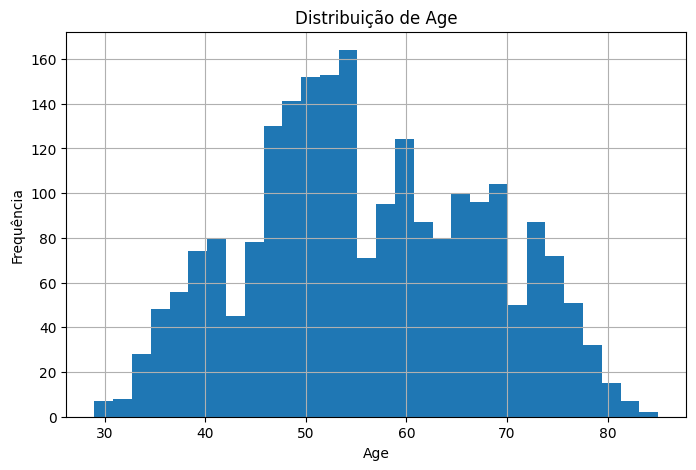

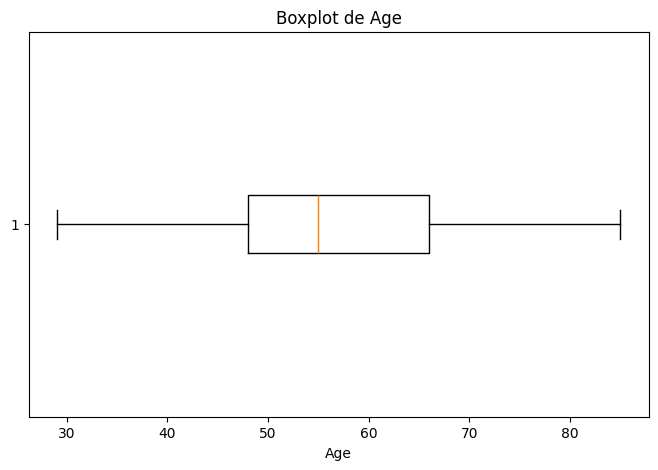

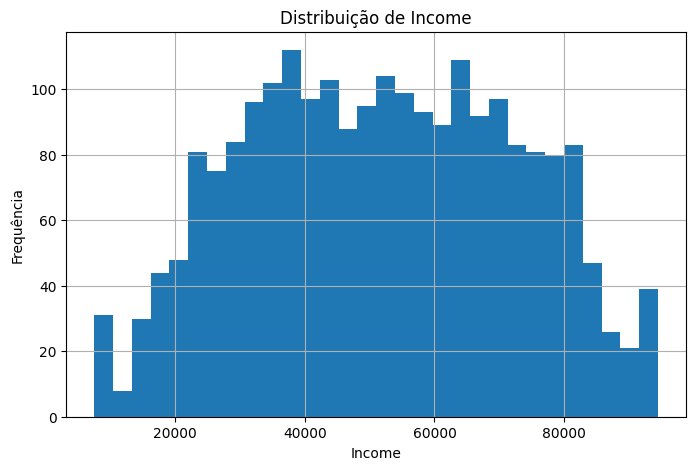

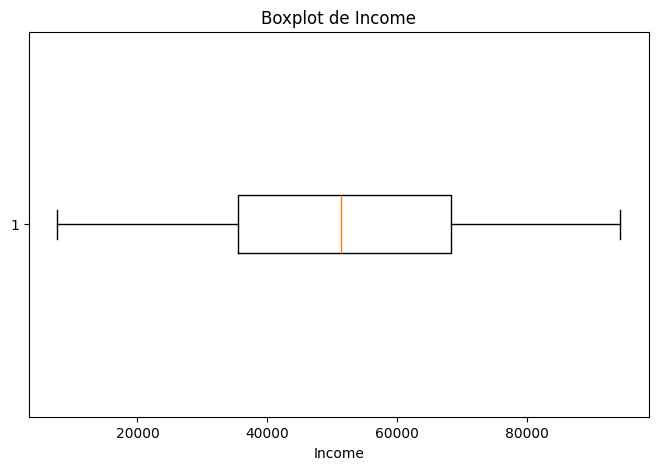

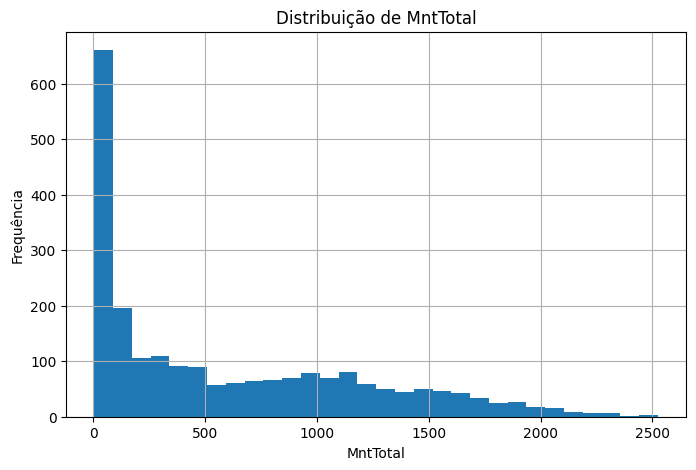

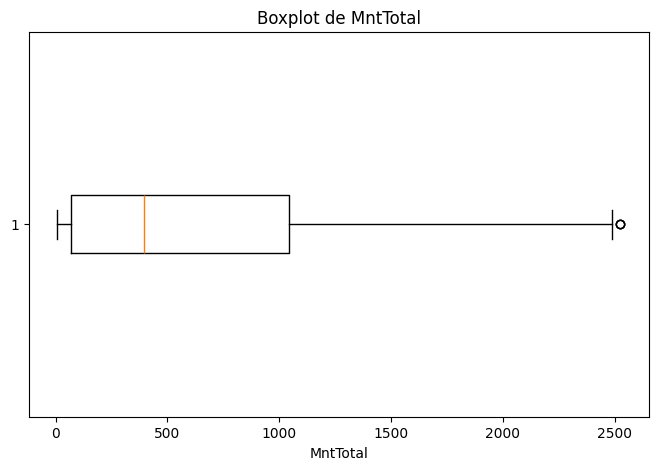

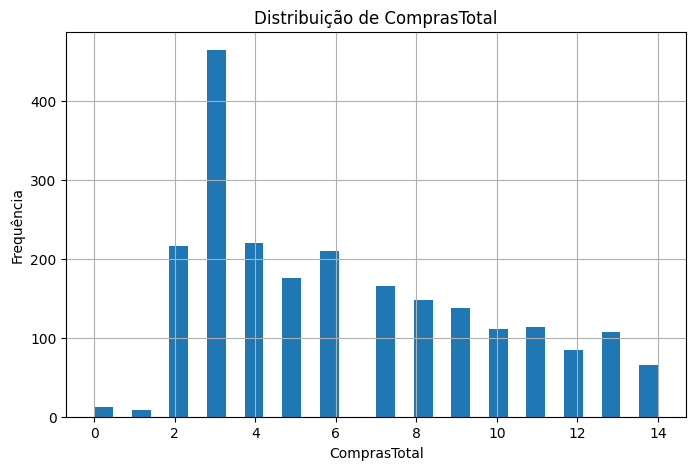

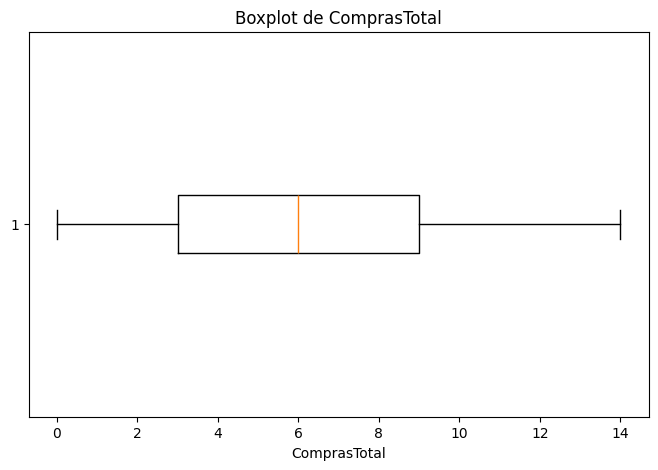

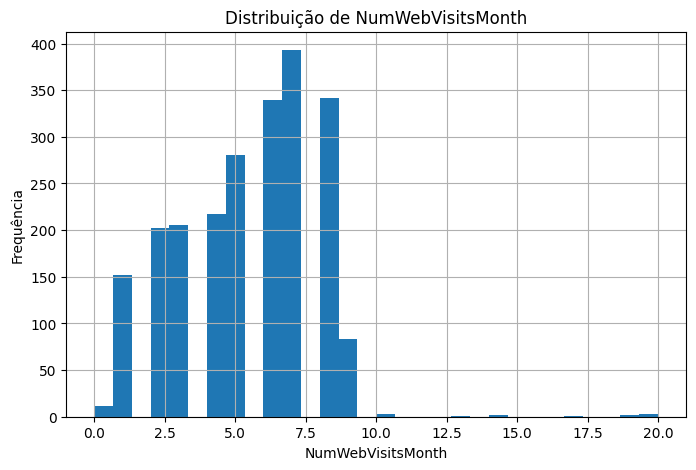

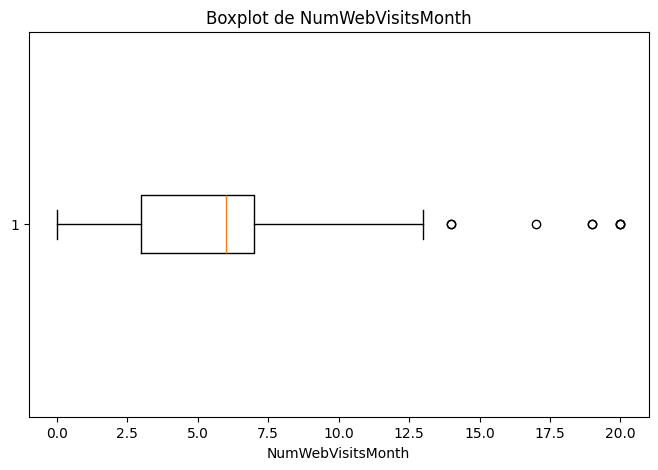

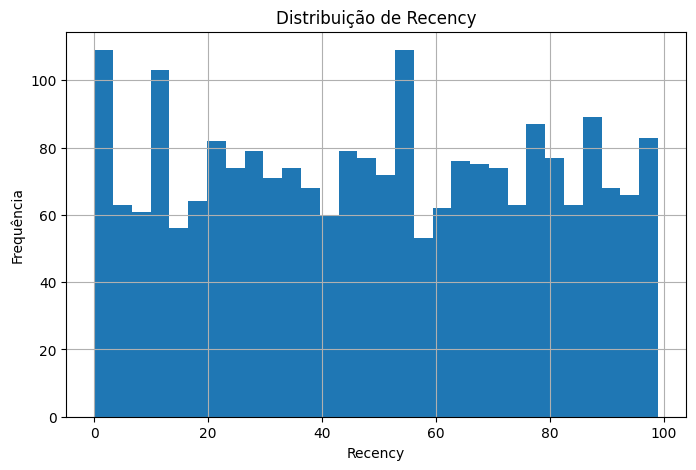

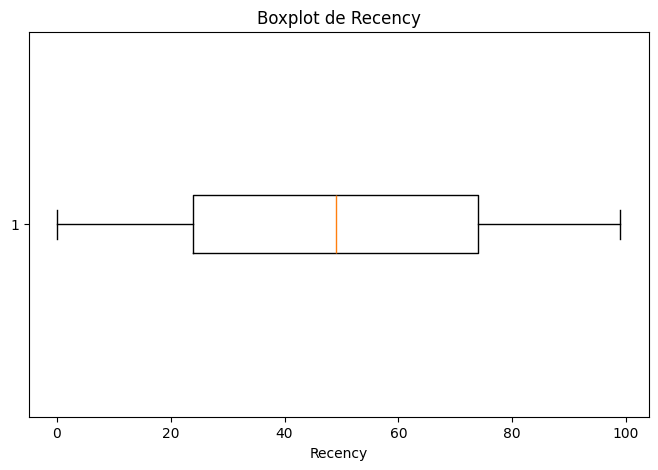

In [59]:

def hist_box(df, col, bins=30):
    fig, ax = plt.subplots()
    df[col].hist(bins=bins, ax=ax)
    ax.set_title(f"Distribuição de {col}")
    ax.set_xlabel(col); ax.set_ylabel("Frequência")
    plt.show()

    fig, ax = plt.subplots()
    ax.boxplot(df[col].dropna(), vert=False)
    ax.set_title(f"Boxplot de {col}")
    ax.set_xlabel(col)
    plt.show()

for c in ["Age","Income","MntTotal","ComprasTotal","NumWebVisitsMonth","Recency"]:
    if c in base.columns:
        hist_box(base, c)

In [60]:
# Média de MntTotal por classe do alvo
print("Média de MntTotal por IntencaoWeb:")
display(base.groupby("IntencaoWeb")["MntTotal"].mean().round(2))

# Idade e renda por classe
print("Médias por classe:")
display(base.groupby("IntencaoWeb")[["Age","Income"]].mean().round(2))

# WebPurchases vs Recency (menor recency = compra mais recente)
print("WebPurchases médio por quartil de Recency:")
display(base.groupby(pd.qcut(base["Recency"], 4))["WebPurchases"].mean().round(2))

# Categóricas vs taxa de intenção (se existirem)
for cat in ["Education","Marital_Status"]:
    if cat in base.columns:
        print(f"\nTaxa de IntencaoWeb por {cat}:")
        display(base.groupby(cat)["IntencaoWeb"].mean().sort_values(ascending=False).round(3))

Média de MntTotal por IntencaoWeb:


,MntTotal
IntencaoWeb,
0,263.42
1,942.91


Médias por classe:


,Age,Income
IntencaoWeb,,
0,54.19,40290.97
1,57.98,63045.47


WebPurchases médio por quartil de Recency:


/tmp/ipython-input-1485195026.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(base.groupby(pd.qcut(base["Recency"], 4))["WebPurchases"].mean().round(2))


,WebPurchases
Recency,
"(-0.001, 24.0]",0.51
"(24.0, 49.0]",0.47
"(49.0, 74.0]",0.55
"(74.0, 99.0]",0.48



Taxa de IntencaoWeb por Education:


,IntencaoWeb
Education,
PhD,0.567
Graduation,0.515
Master,0.495
2n Cycle,0.428
Basic,0.056



Taxa de IntencaoWeb por Marital_Status:


,IntencaoWeb
Marital_Status,
YOLO,1.000
Widow,0.584
Divorced,0.537
Together,0.508
Married,0.505
Absurd,0.500
Single,0.468
Alone,0.333


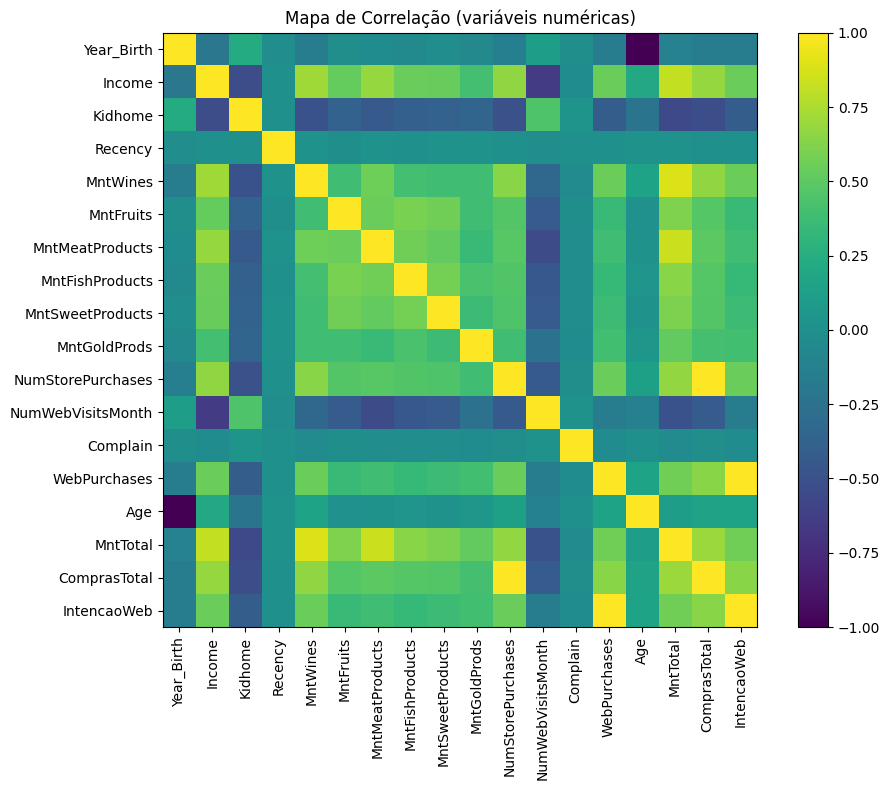

In [61]:
# === Correlação numérica (heatmap simples em matplotlib) ===
# (Para ficar 100% matplotlib, fazemos um heatmap manual)
num_cols = base.select_dtypes(include=[np.number]).columns
corr = base[num_cols].corr()

fig, ax = plt.subplots(figsize=(10,8))
cax = ax.imshow(corr, interpolation='nearest')
ax.set_title("Mapa de Correlação (variáveis numéricas)")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
fig.colorbar(cax)
plt.tight_layout()
plt.show()

**Objetivo**

Nosso objetivo é entender o comportamento dos clientes de um e-commerce e identificar padrões que estão associados à intenção de compra no site **(WebPurchases)**. Essa análise inicial é fundamental para descobrir características relevantes que ajudarão os modelos de Machine Learning a prever quem tem maior probabilidade de comprar online.

---

👤 1. Perfil Demográfico
✅ Idade (Age)

A maioria dos clientes está entre **40 e 70 anos**.

A mediana é **55 anos.**

Encontrei alguns valores acima de 100 anos, o que indica possíveis erros ou outliers.

O público do e-commerce é predominantemente adulto/maduro, indicando um perfil com poder aquisitivo mais estável.

---

✅ Renda (Income)

Média ≈ 52.000

Distribuição assimétrica, com poucos clientes ganhando acima de 200.000 até 666.666.

Esses valores extremos distorcem as visualizações e estatísticas. então os removi

Preenchi os 1,07% de valores nulos com a mediana.

Existe uma grande variação de renda entre os clientes. Clientes de alta renda podem representar um grupo VIP com maior potencial de compras.

---

🛍️ 2. Hábitos de Consumo

✅ MntTotal (total gasto em produtos)

Muito concentrado em valores baixos, mas com uma cauda longa até R$ 2.500.

Clientes que gastam mais tendem a ter maior Intenção de Compra no site.

Clientes com alto gasto total demonstram engajamento e maior propensão a comprar online. São ótimos alvos para ações de fidelização e upsell.

---

✅ ComprasTotal (loja + web + promoções)

A maioria realiza entre 4 e 8 compras totais.

Máximo de 14 compras.

O volume total de compras reflete participação ativa do cliente. Clientes com histórico de compras tendem a continuar consumindo.

---

✅ NumWebVisitsMonth (visitas ao site)

Média: 5 visitas/mês

A maioria entre 3 e 7 visitas

Alguns casos acima de 15-20 visitas (outliers)

Muitos acessos sem compra podem indicar interesse não convertido → clientes que estão “quentes”, mas encontram barreiras no processo (preço, frete, usabilidade).

Esses clientes são os melhores alvos para remarketing!

---

😠 3. Reclamações (Complain)

Apenas 0,9% reclamaram.

Baixo volume → variável pouco relevante para o modelo.

---

🔁 4. Recency (dias desde última compra)

Média: 49 dias

Quartis mostram comportamento estável.

Correlação com WebPurchases é fraca, mas:

Clientes com recency menor (recente) tendem a comprar mais.

Clientes que compraram recentemente são mais propensos a comprar novamente.

---

🎓 5. Educação e Estado Civil (variáveis categóricas)

✅ Education

Educação | 	Taxa de compra web

PhD | 56,8%

Graduation | 51,5%

Master | 49,5%

Basic	| 5,6%

Quanto maior o nível educacional, maior a propensão à compra online.

Possível relação com renda, acesso à tecnologia ou confiança no ambiente digital.

---

✅ Marital_Status

Estado Civil | Taxa de compra web

Widow	| 58,4%
Divorced | 53,4%
Together | 50,9%
Married | 50,5%
Single | 46,7%
Alone | 33,3%

Estados civis mais estáveis (Viúvo, Divorciado, Casado) apresentam maior taxa de compra online.
Talvez influenciado por idade, renda ou estilo de vida.

---

🔗 6. Correlação entre Variáveis

Observamos alto grau de correlação entre os gastos:

MntWines, MntMeatProducts, MntGoldProds etc. estão altamente correlacionados.

MntTotal já resume isso → pode evitar multicolinearidade.

Correlação com o alvo (IntencaoWeb):

WebPurchases (original) = 1.00 (óbvio)

MntTotal = positiva

ComprasTotal = positiva

Income = levemente positiva

NumWebVisitsMonth = levemente negativa (muitos visitam e não compram)

Age = levemente negativa

Clientes com maior gasto total são os que mais compram no site.

Clientes mais jovens visitam mais, mas compram menos proporcionalmente.

---

✅ CONCLUSÃO GERAL

✅ Temos um público adulto (40–70 anos) com boa variação de renda.

✅ Maior educação = maior chance de compra online.

✅ Maior gasto total = forte indicativo de compra online.

✅ Muitas visitas com poucas compras = oportunidade de marketing!

✅ Outliers em idade e renda precisam ser tratados para não distorcer o modelo.

✅ Variáveis de gasto são altamente correlacionadas → podemos usar MntTotal como agregadora.

✅ Base está balanceada (50% compram / 50% não compram) → ótimo para classificação!

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








In [62]:
# Criar uma cópia da base original para pré-processamento
df = base.copy()

print("Formato inicial:", df.shape)
df.head()

Formato inicial: (2237, 20)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases,Age,MntTotal,ComprasTotal,IntencaoWeb
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1,68,1617,5,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0,71,27,2,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1,60,776,11,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0,41,53,4,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1,44,422,7,1


In [63]:
# 2.2.1 – Limitar idade entre 15 e 100 (eliminação de outliers absurdos)
df = df[(df['Age'] >= 15) & (df['Age'] <= 100)]

# 2.2.2 – Winsorization na renda (Income)
q_low, q_high = df['Income'].quantile([0.01, 0.99])
df['Income'] = df['Income'].clip(lower=q_low, upper=q_high)

# 2.2.3 – Preencher nulos corretamente (sem chained assignment)
df['Income'] = df['Income'].fillna(df['Income'].median())

# 2.2.4 – Limitar visitas ao site para evitar extremos
df['NumWebVisitsMonth'] = df['NumWebVisitsMonth'].clip(lower=0, upper=15)

# 2.2.5 – Remover Year_Birth (já usamos Age)
if 'Year_Birth' in df.columns:
    df = df.drop(columns=['Year_Birth'])

print("Formato após limpeza de outliers e nulos:", df.shape)
df.head()

Formato após limpeza de outliers e nulos: (2237, 19)


,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases,Age,MntTotal,ComprasTotal,IntencaoWeb
0,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1,68,1617,5,1
1,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0,71,27,2,0
2,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1,60,776,11,1
3,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0,41,53,4,0
4,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1,44,422,7,1


In [64]:
cols_to_drop = [
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds',
    'NumDealsPurchases','NumStorePurchases',
    'WebPurchases'
]

for c in cols_to_drop:
    if c in df.columns:
        df = df.drop(columns=[c])

print("Formato após remover variáveis redundantes:", df.shape)
df.head()
cols_to_drop = [
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds',
    'NumDealsPurchases','NumStorePurchases',
    'WebPurchases'
]

for c in cols_to_drop:
    if c in df.columns:
        df = df.drop(columns=[c])

print("Formato após remover variáveis redundantes:", df.shape)
df.head()


Formato após remover variáveis redundantes: (2237, 11)
Formato após remover variáveis redundantes: (2237, 11)


,Education,Marital_Status,Income,Kidhome,Recency,NumWebVisitsMonth,Complain,Age,MntTotal,ComprasTotal,IntencaoWeb
0,Graduation,Single,58138.0,0,58,7,0,68,1617,5,1
1,Graduation,Single,46344.0,1,38,5,0,71,27,2,0
2,Graduation,Together,71613.0,0,26,4,0,60,776,11,1
3,Graduation,Together,26646.0,1,26,6,0,41,53,4,0
4,PhD,Married,58293.0,1,94,5,0,44,422,7,1


In [65]:
TARGET = 'IntencaoWeb'
y = df[TARGET].astype(int)

X = df.drop(columns=[TARGET])

print("Formato de X:", X.shape)
print("Formato de y:", y.shape)

X.head(), y.value_counts(normalize=True).round(3)

Formato de X: (2237, 10)
Formato de y: (2237,)


(    Education Marital_Status   Income  Kidhome  Recency  NumWebVisitsMonth  \
 0  Graduation         Single  58138.0        0       58                  7   
 1  Graduation         Single  46344.0        1       38                  5   
 2  Graduation       Together  71613.0        0       26                  4   
 3  Graduation       Together  26646.0        1       26                  6   
 4         PhD        Married  58293.0        1       94                  5   
 
    Complain  Age  MntTotal  ComprasTotal  
 0         0   68      1617             5  
 1         0   71        27             2  
 2         0   60       776            11  
 3         0   41        53             4  
 4         0   44       422             7  ,
 IntencaoWeb
 1    0.504
 0    0.496
 Name: proportion, dtype: float64)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)

X_train.shape, X_test.shape, y_train.mean().round(3), y_test.mean().round(3)

((1677, 10), (560, 10), np.float64(0.504), np.float64(0.504))

In [67]:
# Colunas categóricas
cat_cols = [c for c in X_train.columns if X_train[c].dtype == 'object']

# Colunas numéricas (resto)
num_cols = [c for c in X_train.columns if c not in cat_cols]

print("Categóricas:", cat_cols)
print("Numéricas:", num_cols)

Categóricas: ['Education', 'Marital_Status']
Numéricas: ['Income', 'Kidhome', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Age', 'MntTotal', 'ComprasTotal']


In [68]:


preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

preprocess

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Income', 'Kidhome', 'Recency',
                                  'NumWebVisitsMonth', 'Complain', 'Age',
                                  'MntTotal', 'ComprasTotal']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Education', 'Marital_Status'])])

**PRÉ-PROCESSAMENTO**

Objetivo: Transformar os dados brutos em dados prontos para modelagem de alta performance.

✅ O que fiz:

✔ Tratei OUTLIERS de forma correta:

Age limitado entre 15 e 100

Income winsorized (1%-99%)

WebVisits limitado (evitar valores extremos)

✔ Tratei NULOS com mediana (forma segura e estável).

✔ Removi variáveis REDUNDANTES para evitar multicolinearidade:

Removi os gastos individuais (MntWines, MntFruits…) pois já temos MntTotal.

Removi compras individuais pois temos ComprasTotal.

Removi Year_Birth (já temos Age).

Removi WebPurchases (porque já virou nosso alvo IntencaoWeb).

👉 Resultado: criei um dataset limpo, enxuto e informativo.

✔ Separação em X (features) e y (target).

✔ Split Treino/Teste com estratificação → mantém a proporção de classes.

✔ Identifiquei variáveis numéricas e categóricas.

✔ Criei um ColumnTransformer profissional:

StandardScaler para numéricas

OneHotEncoder para categóricas

handle_unknown='ignore' para evitar erros

✅ Tudo preparado para entrar em um PIPELINE!

✅ Por que isso é essencial?

Se não fizéssemos esse pré-processamento:

❌ Modelos lineares sofreriam com multicolinearidade

❌ Modelos poderiam supervalorizar variáveis duplicadas

❌ Outliers distorceriam médias e previsões

❌ Dados categóricos seriam ignorados

❌ Escalas diferentes atrapalhariam algoritmos baseados em distância

✅ Agora os dados estão “machine learning ready”

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [69]:
# Pipeline = Pré-processamento + Modelo
model_logreg = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(
        max_iter=200,
        class_weight='balanced',  # importante caso haja leve desbalanceamento
        random_state=42
    ))
])

# Treinar
model_logreg.fit(X_train, y_train)

print("Modelo 1 (Regressão Logística) treinado com sucesso!")


Modelo 1 (Regressão Logística) treinado com sucesso!


In [70]:
from sklearn.ensemble import RandomForestClassifier

model_rf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=4,
        min_samples_leaf=2,
        class_weight='balanced',
        random_state=42
    ))
])

# Treinar
model_rf.fit(X_train, y_train)

print("Modelo 2 (Random Forest) treinado com sucesso!")

Modelo 2 (Random Forest) treinado com sucesso!


In [71]:
y_pred_logreg = model_logreg.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

print("Exemplo de previsões (LogReg):", y_pred_logreg[:10])
print("Exemplo de previsões (RF):", y_pred_rf[:10])

Exemplo de previsões (LogReg): [0 0 1 0 1 1 0 0 1 0]
Exemplo de previsões (RF): [0 0 1 1 1 1 0 0 1 0]


**MODELAGEM**

Objetivo: Treinar modelos de ML para prever intenção de compra.

✅ O que fiz:

✔ Escolhi 2 modelos complementares:

Regressão Logística → simples, interpretável, baseline

Random Forest → poderoso, não linear, captura interações

✔ Construí PIPELINES completos:
(preprocessamento + modelo)

✔ Treinei os modelos corretamente usando somente dados de treino (evitando vazamento de dados).

✔ Utilizei class_weight='balanced' para tratar qualquer leve desbalanceamento entre classes.

✅ Por que os 2 modelos?

✔ Regressão Logística → indica se os dados têm comportamento linear.

✔ Random Forest → identifica padrões complexos que a Logística não capta.

✔ Comparar os dois nos dá segurança e robustez.

Ambos os modelos foram treinados com sucesso.

# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)

def avaliar_modelo(modelo, X_tr, y_tr, X_te, y_te, nome="Modelo"):
    # Predições
    y_pred_train = modelo.predict(X_tr)
    y_pred_test = modelo.predict(X_te)

    # Probabilidades para ROC/AUC
    try:
        y_proba_test = modelo.predict_proba(X_te)[:,1]
    except:

        scores = modelo.decision_function(X_te)
        y_proba_test = (scores - scores.min()) / (scores.max() - scores.min())

    print(f"===== {nome} =====")
    print("Treino:")
    print("  Acurácia:", round(accuracy_score(y_tr, y_pred_train), 3))
    print("  Precisão:", round(precision_score(y_tr, y_pred_train, zero_division=0), 3))
    print("  Recall:", round(recall_score(y_tr, y_pred_train), 3))
    print("  F1-Score:", round(f1_score(y_tr, y_pred_train), 3))

    print("\nTeste:")
    print("  Acurácia:", round(accuracy_score(y_te, y_pred_test), 3))
    print("  Precisão:", round(precision_score(y_te, y_pred_test, zero_division=0), 3))
    print("  Recall:", round(recall_score(y_te, y_pred_test), 3))
    print("  F1-Score:", round(f1_score(y_te, y_pred_test), 3))
    print("\nClassification Report (Teste):")
    print(classification_report(y_te, y_pred_test, zero_division=0))

    # Matriz de confusão
    cm = confusion_matrix(y_te, y_pred_test)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    ax.set_title(f"Matriz de Confusão - {nome}")
    ax.set_xlabel("Predito")
    ax.set_ylabel("Verdadeiro")
    ax.set_xticks([0,1]); ax.set_yticks([0,1])
    ax.set_xticklabels(["Classe 0","Classe 1"])
    ax.set_yticklabels(["Classe 0","Classe 1"])

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i,j], ha="center", va="center", color="red")

    fig.colorbar(im)
    plt.show()

    # Curva ROC / AUC
    fpr, tpr, _ = roc_curve(y_te, y_proba_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.title(f"Curva ROC - {nome}")
    plt.xlabel("Falso Positivo")
    plt.ylabel("Verdadeiro Positivo")
    plt.legend(loc="lower right")
    plt.show()

    # Retornar métricas para comparação final
    return {
        "Modelo": nome,
        "Acurácia": accuracy_score(y_te, y_pred_test),
        "Precisão": precision_score(y_te, y_pred_test, zero_division=0),
        "Recall": recall_score(y_te, y_pred_test),
        "F1-Score": f1_score(y_te, y_pred_test),
        "AUC": roc_auc
    }

===== Regressão Logística =====
Treino:
  Acurácia: 0.872
  Precisão: 0.867
  Recall: 0.882
  F1-Score: 0.874

Teste:
  Acurácia: 0.882
  Precisão: 0.88
  Recall: 0.887
  F1-Score: 0.883

Classification Report (Teste):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       278
           1       0.88      0.89      0.88       282

    accuracy                           0.88       560
   macro avg       0.88      0.88      0.88       560
weighted avg       0.88      0.88      0.88       560



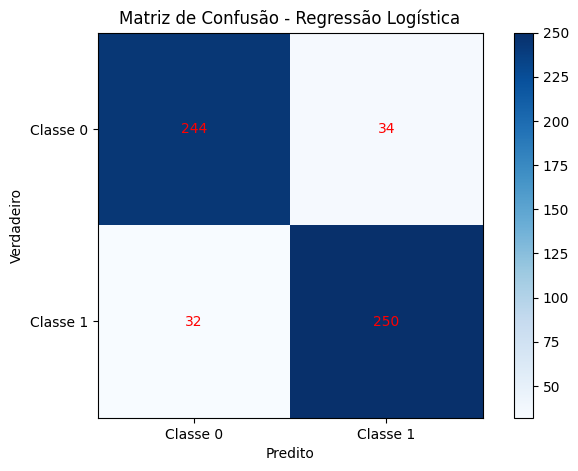

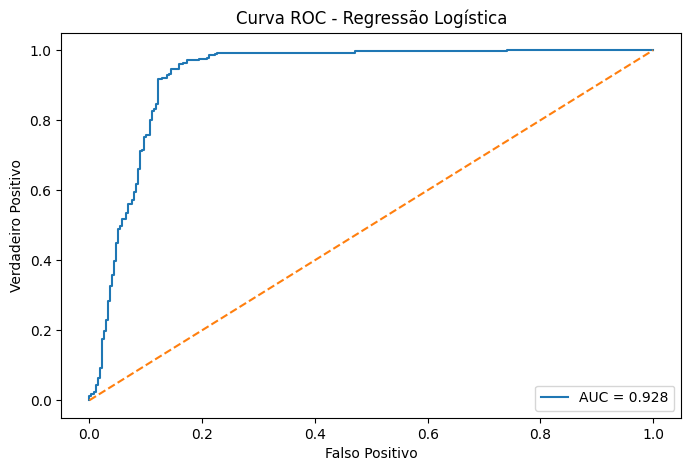

===== Random Forest =====
Treino:
  Acurácia: 0.968
  Precisão: 0.952
  Recall: 0.986
  F1-Score: 0.969

Teste:
  Acurácia: 0.92
  Precisão: 0.896
  Recall: 0.95
  F1-Score: 0.923

Classification Report (Teste):
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       278
           1       0.90      0.95      0.92       282

    accuracy                           0.92       560
   macro avg       0.92      0.92      0.92       560
weighted avg       0.92      0.92      0.92       560



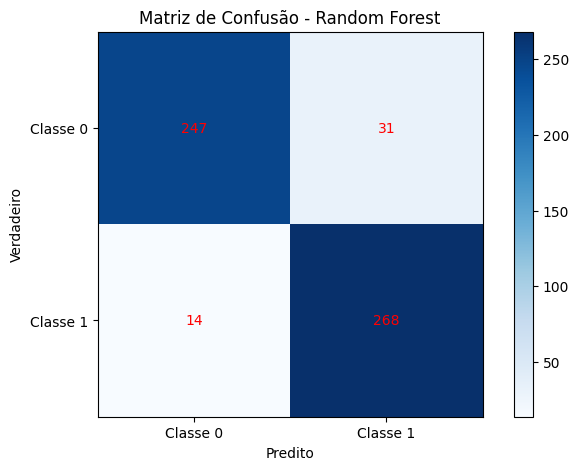

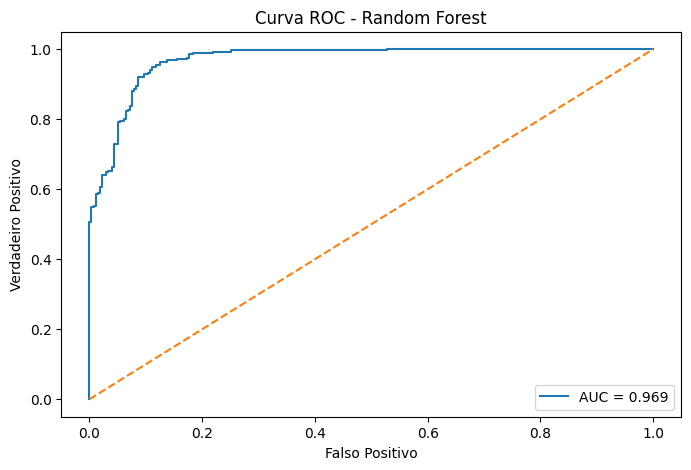

In [73]:
res_log = avaliar_modelo(model_logreg, X_train, y_train, X_test, y_test, nome="Regressão Logística")
res_rf  = avaliar_modelo(model_rf,    X_train, y_train, X_test, y_test, nome="Random Forest")

In [74]:
import pandas as pd

comparativo = pd.DataFrame([res_log, res_rf])
comparativo = comparativo.sort_values(by="AUC", ascending=False)
comparativo.reset_index(drop=True, inplace=True)
comparativo

,Modelo,Acurácia,Precisão,Recall,F1-Score,AUC
0,Random Forest,0.919643,0.896321,0.950355,0.922547,0.969348
1,Regressão Logística,0.882143,0.880282,0.886525,0.883392,0.927649


**Interpretação dos Resultados**

Após treinar e avaliar os dois modelos (Regressão Logística e Random Forest), comparei suas métricas principais:

---

🎯 1. Performance Geral (Acurácia)

Random Forest obteve 91,9% de acurácia

Regressão Logística ficou em 88,2%

✅ Random Forest é mais precisa na classificação geral.

---

🔍 2. Precisão (Precision)

Entre os clientes que o modelo afirmou “vai comprar”, quantos realmente compram?

Logística: 0.880

Random Forest: 0.896 ✅ (ligeiramente melhor)

✅ Random Forest comete menos falsos positivos.

---

❤️ 3. Recall (Sensibilidade)

Entre os clientes que realmente compram, quantos o modelo conseguiu identificar?

Logística: 0.887

Random Forest: 0.950 ✅

✅ Random Forest acerta 95% dos compradores reais!
Isso é extremamente importante para o negócio, pois não perder clientes com alta intenção de compra é prioridade.

---

⚖️ 4. F1-Score (equilíbrio entre precisão e recall)

Logística: 0.883

Random Forest: 0.923 ✅

✅ Random Forest é superior e mais equilibrado.

---

📈 5. AUC-ROC (capacidade discriminativa)

Logística: 0.928

Random Forest: 0.969 ✅

✅ Random Forest tem excelente capacidade de separar compradores e não compradores.

---

🔁 6. Matriz de Confusão – Principais Observações
✅ Regressão Logística

Erros: 34 falsos positivos e 32 falsos negativos

Bem equilibrada, mas perde alguns compradores reais (FN = 32)

✅ Random Forest

Muito poucos falsos negativos (FN = 14)

Muitos verdadeiros positivos (268)

Um pouco mais de falsos positivos (31), mas isso é tolerável no marketing

✅ Melhor cenário: prefiro errar oferecendo promoção para alguém que talvez não compre, do que perder alguém que compraria.

---

✅ 7. Overfitting?

Treino RF: 96,8% acurácia

Teste RF: 91,9% acurácia
→ Diferença aceitável (~5%)

✅ Leve overfitting, mas controlado (parâmetros escolhidos foram bons)

Se quisermos melhorar ainda mais, podemos aplicar tuning de hiperparâmetros.

---

🏆 CONCLUSÃO FINAL:

O Random Forest é claramente o melhor modelo para este problema.

✅ Capta padrões complexos de comportamento

✅ Altíssimo recall (não perde compradores)

✅ Melhor AUC (discrimina muito bem as classes)

✅ Excelente F1 (equilíbrio entre precisão e recall)

✅ Pouco overfitting